In [9]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
import swifter
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [2]:
df = pd.read_csv('data/no_stopword.csv')
df['Tweet'] = df['Tweet'].astype(str)

bots = df[df['predicted'] == 1]
humans = df[df['predicted'] == 0]

In [3]:
(len(bots)/len(df))*100

12.626689592660886

In [72]:
df['pos_neg'] = df['Positive'] - df['Negative']

bots = df[df['predicted'] == 1]
humans = df[df['predicted'] == 0]

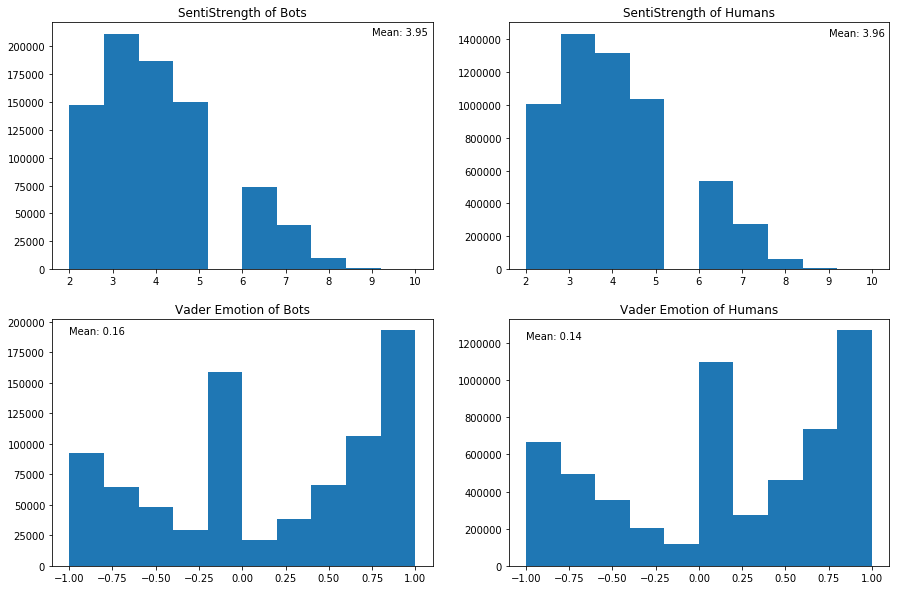

In [84]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].hist(bots['pos_neg'])
axes[0][0].set_title('SentiStrength of Bots')
axes[0][0].text(9, 210000 , 'Mean: {}'.format(round(bots['pos_neg'].mean(), 2)))

axes[0][1].hist(humans['pos_neg'])
axes[0][1].set_title('SentiStrength of Humans')
axes[0][1].text(9, 1420000, 'Mean: {}'.format(round(humans['pos_neg'].mean(), 2)))

axes[1][0].hist(bots['vader_emotion'])
axes[1][0].set_title('Vader Emotion of Bots')
axes[1][0].text(-1, 190000 , 'Mean: {}'.format(round(bots['vader_emotion'].mean(), 2)))

axes[1][1].hist(humans['vader_emotion'])
axes[1][1].set_title('Vader Emotion of Humans')
a = axes[1][1].text(-1, 1220000 , 'Mean: {}'.format(round(humans['vader_emotion'].mean(), 2)))

fig.savefig('../../writeup/images/emotions.png')

In [6]:
len(df)

6489286

In [7]:
len(df['User'].unique())

1692356

In [8]:
# nltk.download('vader_lexicon')
# nltk.download('stopwords')

In [9]:
# stop = stopwords.words('english')
# stop = stop + list(STOPWORDS) + ['rt', 'quotedstatus', 'amp', 'retweetedstatus']
# stop = list(set(stop))

# pattern = [ 
#                 "@[A-Za-z0-9]+", #mentions
#                 'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs'
#                 '([^a-zA-Z0-9 ]+?)', #anything else except text and space
#             ]
# sub_pattern = re.compile('|'.join(pattern))

# stop = [re.sub(sub_pattern, '', word).strip() for word in stop]

# df = pd.read_csv('../../data/all_cleaned.csv')

# df['Tweet'] = df['Tweet'].replace('\s+', ' ', regex=True)

# def cleanData(data):
#     global sub_pattern
    
    
#     if isinstance(data, pd.Series):
#         data = data.str.lower()
#         replaced = data.str.replace(sub_pattern, '').str.strip()
#     else:

#         data = data.lower()
#         replaced = re.sub(sub_pattern, '', word).strip()
        
#     return replaced

# df['Tweet'] = cleanData(df['Tweet'])

# df.to_csv('no_stopword.csv', index=None)

In [10]:
# df['Tweet'] = df['Tweet'].replace(np.nan, "")
# df['Tweet'] = df['Tweet'].swifter.apply(lambda x: [item for item in x.split() if item not in stop])
# df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))
# df.to_csv('no_stopword.csv', index=None)

In [11]:
# def get_wordcount_dataframe(tweets):
#     words_df = tweets.str.split(expand=True).stack().value_counts()
#     words_df = words_df.reset_index().rename(columns={'index': 'Word', 0: 'Count'})
#     return words_df

# bot_words_df = get_wordcount_dataframe(bots['Tweet'])
# bot_words_df.to_csv('bot_words.csv', index=None)

# humans_dic = {}
# interval = int(len(humans)/7)+1
# starting=0

# for i in range(interval, len(humans), interval):
#     humans_dic[int(i/interval)] = humans[:interval]
#     humans = humans[interval:]
    
# humans_dic[int(i/interval)+1] = humans

# humans_count = {}

# for idx, t_df in humans_dic.items():
#     print(idx)
#     humans_count[idx] = get_wordcount_dataframe(t_df['Tweet'])
#     humans_count[idx].to_csv('human_words_{}.csv'.format(idx), index=None)

# merged = humans_count[1]

# for i in range(2, len(humans_count)+1):
#     merged = merged.merge(humans_count[i], how='outer', on='Word').replace(np.nan, 0)
#     merged['Count'] = merged['Count_x'] + merged['Count_y']
#     merged = merged[['Word', 'Count']]

# humans_count = merged.sort_values('Count', ascending=False)

# humans_count.to_csv('humans_words.csv', index=None)

In [9]:
bot_words_df = pd.read_csv('data/bot_words.csv')
humans_count = pd.read_csv('data/humans_words.csv')

In [10]:
combined_words = humans_count.merge(bot_words_df, how='outer', on='Word').replace(np.nan, 0)

In [11]:
combined_words['Count'] = combined_words['Count_x'] + combined_words['Count_y']

In [12]:
combined_words = combined_words[['Word', 'Count']]

In [13]:
bot_words_df = bot_words_df.sort_values('Count', ascending=False)

In [14]:
humans_count = humans_count.sort_values('Count', ascending=False)

In [15]:
combined_words = combined_words.sort_values('Count', ascending=False)

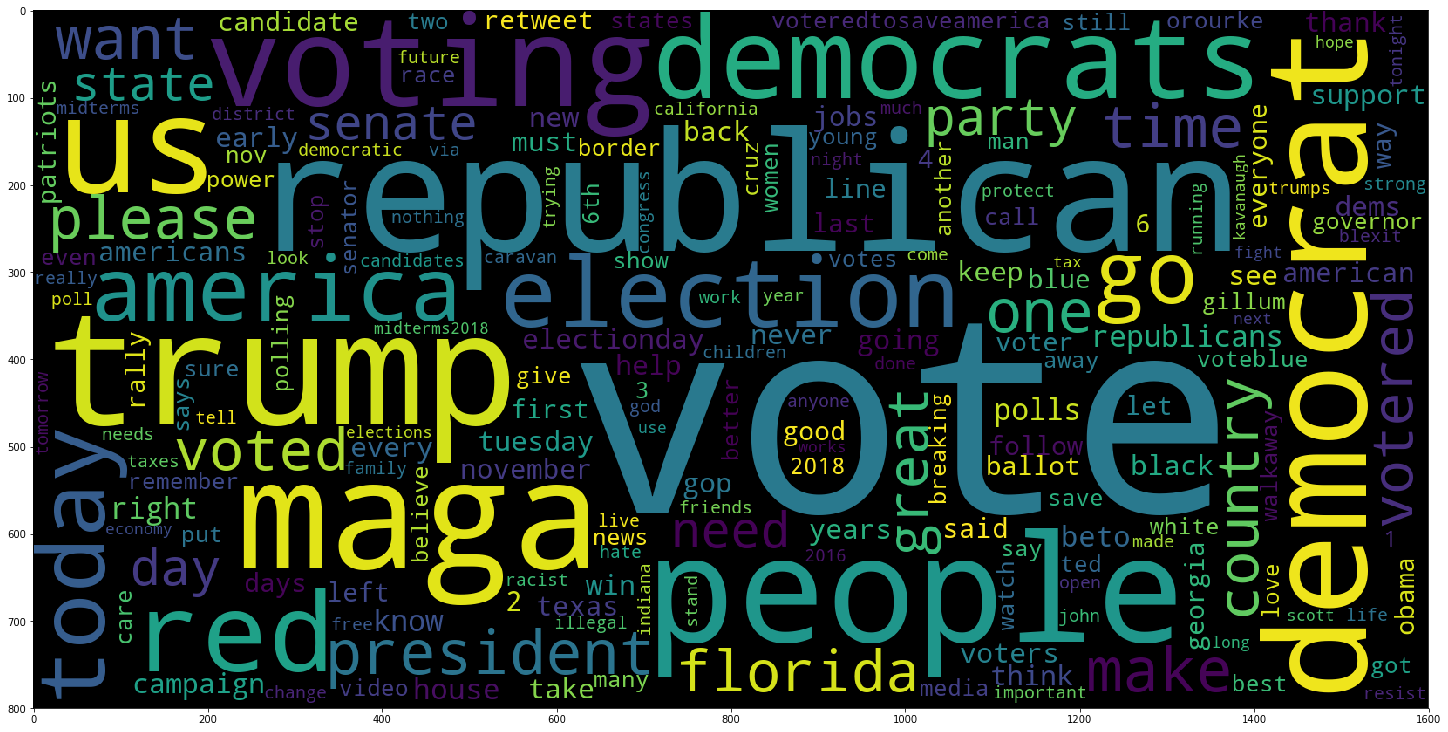

In [16]:
bot_dic = bot_words_df[:200].set_index('Word')['Count'].to_dict()
w = WordCloud(width=1600, height=800)
wordcloud = w.generate_from_frequencies(bot_dic)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)

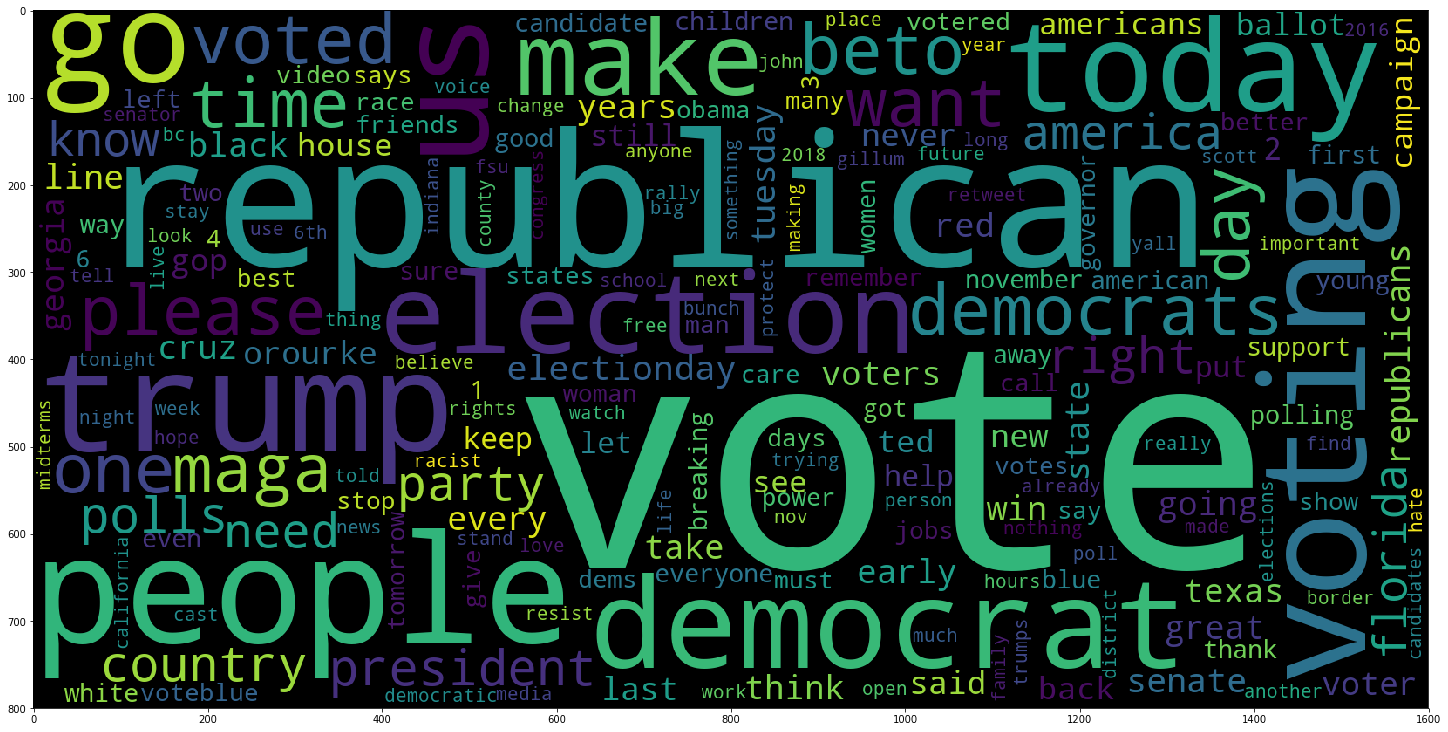

In [18]:
human_dic = humans_count[:200].set_index('Word')['Count'].to_dict()
w = WordCloud(width=1600, height=800)
wordcloud = w.generate_from_frequencies(human_dic)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)

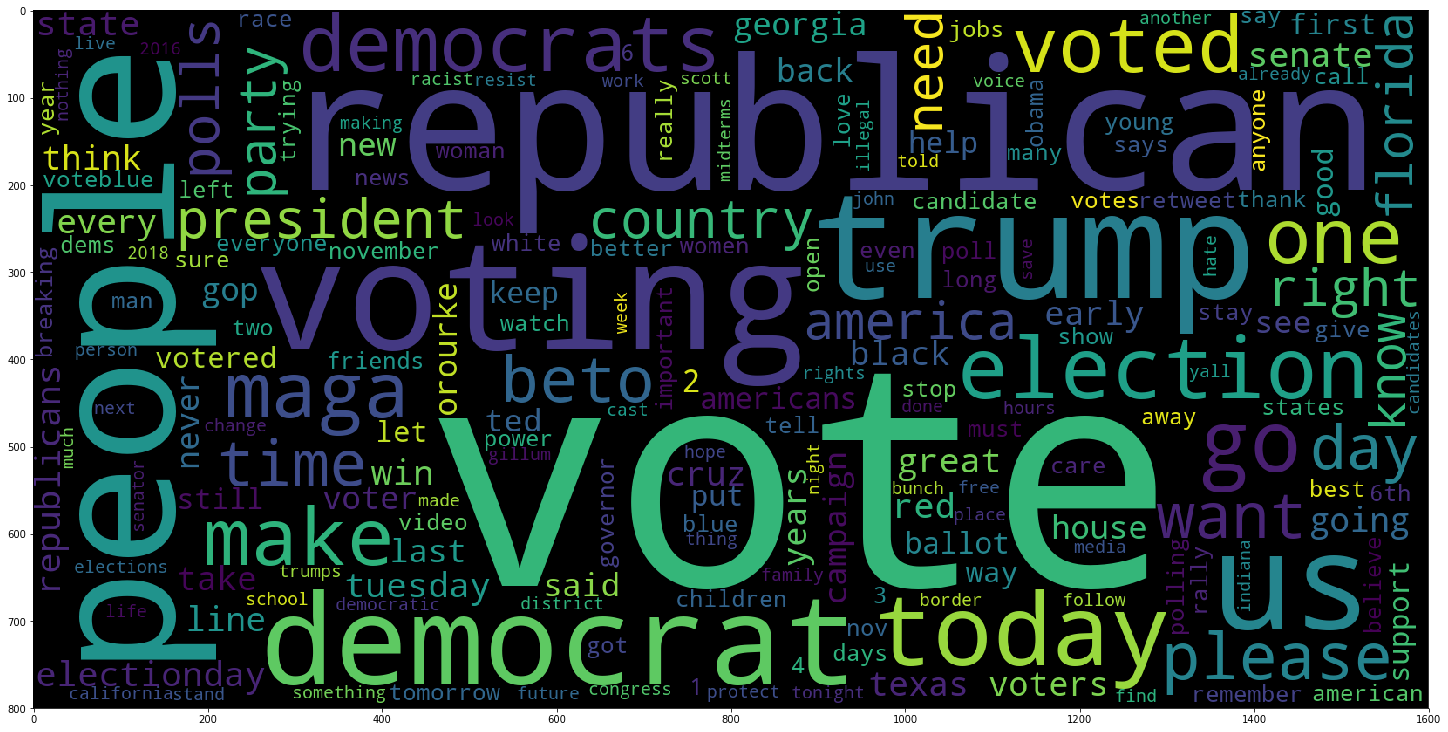

In [19]:
combined_dic = combined_words[:200].set_index('Word')['Count'].to_dict()
w = WordCloud(width=1600, height=800)
wordcloud = w.generate_from_frequencies(combined_dic)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)

In [20]:
humans_count['percentage'] = ((humans_count['Count'] / sum(humans_count['Count'])) * 100).round(4)

In [21]:
bot_words_df['percentage'] = ((bot_words_df['Count'] / sum(bot_words_df['Count'])) * 100).round(4)

In [22]:
humans_count = humans_count[humans_count['percentage'] > 0.03].reset_index(drop=True)
bot_words_df = bot_words_df[bot_words_df['percentage'] > 0.03].reset_index(drop=True)

In [23]:
humans_count

,Word,Count,percentage
0,vote,6747653.0,4.4337
1,republican,1105946.0,0.7267
2,people,1027670.0,0.6753
3,voting,967288.0,0.6356
4,trump,881620.0,0.5793
5,today,714226.0,0.4693
6,us,713995.0,0.4691
7,go,703300.0,0.4621
8,democrat,696277.0,0.4575
9,election,692836.0,0.4552


In [24]:
bot_words_df

,Word,Count,percentage
0,vote,872822,4.0190
1,republican,159731,0.7355
2,trump,148546,0.6840
3,maga,136836,0.6301
4,people,129953,0.5984
5,democrat,114501,0.5272
6,us,106408,0.4900
7,voting,105916,0.4877
8,democrats,94732,0.4362
9,red,90425,0.4164


In [25]:
merged = bot_words_df.merge(humans_count,on='Word', suffixes=('_bot', '_human'))

In [26]:
merged['percentage_difference'] = ((merged['percentage_bot'] - merged['percentage_human'])/merged['percentage_human'])*100

In [29]:
mostly_humans = merged.sort_values('percentage_difference')[:100][['Word', 'percentage_difference']]
mostly_humans['percentage_difference'] = mostly_humans['percentage_difference'] * -1
mostly_humans = mostly_humans.set_index('Word')['percentage_difference'].to_dict()
w = WordCloud(width=1600, height=800)
wordcloud = w.generate_from_frequencies(mostly_humans)
plt.figure(figsize=(25,20))
w.to_image()
w.to_file('../../writeup/images/mostly_humans.png')

<Figure size 1800x1440 with 0 Axes>

In [30]:
mostly_bots = merged.sort_values('percentage_difference', ascending=False)[:100][['Word', 'percentage_difference']]
mostly_bots = mostly_bots.set_index('Word')['percentage_difference'].to_dict()
w = WordCloud(width=1600, height=800)
wordcloud = w.generate_from_frequencies(mostly_bots)
plt.figure(figsize=(25,20))
w.to_image()
w.to_file('../../writeup/images/mostly_bots.png')

<Figure size 1800x1440 with 0 Axes>

In [32]:
merged.sort_values('percentage_difference', ascending=False)[:100][['Word', 'percentage_difference']].to_csv('../../writeup/tables/words.csv', index=None)

In [31]:
merged.sort_values('percentage_difference')[:100][['Word', 'percentage_difference']]

,Word,percentage_difference
462,bunch,-58.440047
399,yall,-52.095130
407,bc,-45.844156
476,shot,-45.454545
227,woman,-43.218954
182,children,-41.602787
86,line,-41.316348
290,school,-41.313559
93,cruz,-39.701074
496,points,-39.238095
